<a href="https://colab.research.google.com/github/yashfirkedata/DL-Patient-Survival-Prediction/blob/main/patient_survival_prediction_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Modelling on Patient Survival Prediction**

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv("/content/drive/MyDrive/Datasets/psp_modelling_data.csv")

In [4]:
data.head()

,hospital_death,age,bmi,elective_surgery,height,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,...,isin_Cardiovascular.1,isin_Gastrointestinal.1,isin_Haematologic,isin_Metabolic.1,isin_Neurologic,isin_Renal/Genitourinary,isin_Respiratory.1,isin_Trauma.1,isin_Undefined Diagnoses,isin_Undefined diagnoses
0,0,68.0,22.730000,0,180.3,0.541667,73.9,113.0,502.01,0,...,True,False,False,False,False,False,False,False,False,False
1,0,77.0,27.420000,0,160.0,0.927778,70.2,108.0,203.01,0,...,False,False,False,False,False,False,True,False,False,False
2,0,67.0,27.560000,0,190.5,0.000694,100.0,301.0,403.01,0,...,False,False,False,False,True,False,False,False,False,False
3,0,46.0,25.845717,0,167.6,0.000000,72.6,108.0,203.01,0,...,False,False,False,False,False,False,True,False,False,False
4,0,87.0,21.963763,0,180.3,5.046528,71.4,113.0,501.05,0,...,True,False,False,False,False,False,False,False,False,False


In [5]:
# separating target and predictor variables
data_y = data['hospital_death']
data_x = data.drop('hospital_death',axis=1)

In [6]:
data_y.value_counts()

hospital_death
0    48461
1     4652
Name: count, dtype: int64

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y,  test_size=0.2, shuffle = True, random_state = 8)

In [8]:
X_train.shape, y_train.shape

((42490, 135), (42490,))

In [9]:
pd.set_option('display.max_columns', None)
X_train.head()

,age,bmi,elective_surgery,height,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,ventilated_apache,wbc_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,isin_African American,isin_Asian,isin_Caucasian,isin_Hispanic,isin_Native American,isin_Other/Unknown,isin_F,isin_M,isin_CCU-CTICU,isin_CSICU,isin_CTICU,isin_Cardiac ICU,isin_MICU,isin_Med-Surg ICU,isin_Neuro ICU,isin_SICU,isin_Cardiovascular,isin_Gastrointestinal,isin_Genitourinary,isin_Gynecological,isin_Hematological,isin_Metabolic,isin_Musculoskeletal/Skin,isin_Neurological,isin_Respiratory,isin_Sepsis,isin_Trauma,isin_Cardiovascular.1,isin_Gastrointestinal.1,isin_Haematologic,isin_Metabolic.1,isin_Neurologic,isin_Renal/Genitourinary,isin_Respiratory.1,isin_Trauma.1,isin_Undefined Diagnoses,isin_Undefined diagnoses
28981,69.0,31.972318,1,170.0,2.662500,92.4,308.0,1207.01,1,0,7.0,0.60,3.0,6.0,0,3.0,127.0,91.0,28.2,1,57.0,29.0,138.0,36.8,1,14.90,67.0,41.0,67.0,41.0,91.0,80.0,73.0,57.0,73.0,57.0,29.0,12.0,100.0,92.0,127.0,94.0,127.0,94.0,37.1,36.7,62.0,55.0,62.0,55.0,91.0,90.0,73.0,68.0,73.0,68.0,23.0,12.0,99.0,98.0,127.0,105.0,127.0,105.0,37.1,36.9,8.0,7.0,8.1,8.1,0.69,0.60,127.0,105.0,20.0,20.0,13.3,8.6,39.0,27.0,245.0,227.0,4.5,3.8,140.0,138.0,16.50,11.50,0.01,0.00,0,0,0,0,0,0,0,0,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
34168,43.0,42.292992,0,167.6,0.169444,118.8,113.0,501.05,0,0,9.0,0.51,4.0,6.0,0,5.0,184.0,101.0,42.2,0,134.0,39.0,132.0,35.8,1,13.75,123.0,78.0,123.0,78.0,100.0,41.0,134.0,89.0,134.0,89.0,47.0,16.0,98.0,82.0,181.0,125.0,181.0,125.0,36.2,35.8,112.0,93.0,112.0,93.0,91.0,59.0,127.0,106.0,127.0,106.0,26.0,19.0,98.0,89.0,172.0,135.0,172.0,135.0,36.2,36.2,9.0,9.0,8.8,8.8,0.51,0.51,207.0,147.0,26.0,26.0,13.7,13.7,42.2,42.2,294.0,294.0,4.7,4.7,132.0,132.0,13.75,13.75,0.05,0.03,0,0,0,0,1,0,0,0,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False
17273,30.0,21.527821,0,152.4,-0.004167,50.0,123.0,702.01,0,0,18.0,0.76,4.0,6.0,0,5.0,298.0,139.0,40.1,0,71.0,29.0,140.0,36.7,0,12.70,81.0,57.0,81.0,57.0,134.0,93.0,101.0,71.0,101.0,71.0,29.0,14.0,100.0,96.0,144.0,111.0,144.0,111.0,38.0,36.7,63.0,63.0,63.0,63.0,117.0,117.0,81.0,81.0,81.0,81.0,27.0,27.0,100.0,100.0,132.0,132.0,132.0,132.0,36.7,36.7,18.0,6.0,7.7,6.5,0.87,0.58,330.0,69.0,17.0,7.0,14.1,12.8,40.1,36.3,205.0

###**Standardization**

In [10]:
from sklearn.preprocessing import MinMaxScaler
# creating an instance for MinMaxScaler
scaler = MinMaxScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [11]:
# storing the normalized data into a new dataframe
X_train_new = pd.DataFrame(X_train_std, columns= X_train.columns)
X_test_new = pd.DataFrame(X_test_std, columns= X_test.columns)

In [12]:
X_test_new.head()

,age,bmi,elective_surgery,height,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,ventilated_apache,wbc_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,isin_African American,isin_Asian,isin_Caucasian,isin_Hispanic,isin_Native American,isin_Other/Unknown,isin_F,isin_M,isin_CCU-CTICU,isin_CSICU,isin_CTICU,isin_Cardiac ICU,isin_MICU,isin_Med-Surg ICU,isin_Neuro ICU,isin_SICU,isin_Cardiovascular,isin_Gastrointestinal,isin_Genitourinary,isin_Gynecological,isin_Hematological,isin_Metabolic,isin_Musculoskeletal/Skin,isin_Neurological,isin_Respiratory,isin_Sepsis,isin_Trauma,isin_Cardiovascular.1,isin_Gastrointestinal.1,isin_Haematologic,isin_Metabolic.1,isin_Neurologic,isin_Renal/Genitourinary,isin_Respiratory.1,isin_Trauma.1,isin_Undefined Diagnoses,isin_Undefined diagnoses
0,0.794521,0.337382,0.0,0.733002,0.004253,0.457259,0.077295,0.002381,0.0,0.0,0.089431,0.048713,1.000000,1.0,0.0,1.0,0.176880,0.209459,0.846591,0.0,0.17500,0.142857,0.560976,0.592105,0.0,0.109131,0.403361,0.519481,0.403361,0.519481,0.210084,0.429530,0.314516,0.511111,0.322314,0.511111,0.141026,0.125000,0.977011,0.94,0.500000,0.588235,0.500000,0.588131,0.375000,0.780071,0.311321,0.406593,0.308411,0.402174,0.245763,0.268519,0.344828,0.405660,0.350877,0.405660,0.204082,0.124031,0.977778,0.96,0.581081,0.539007,0.581081,0.535211,0.524590,0.578125,0.090164,0.109002,0.478261,0.604167,0.045497,0.054991,0.120818,0.372549,0.535714,0.62500,0.846154,0.903509,0.823151,0.882006,0.211470,0.234645,0.238095,0.352941,0.485714,0.638889,0.102496,0.122506,0.515152,0.512690,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.452055,0.383497,0.0,0.303134,0.004367,0.310448,0.053140,0.002857,0.0,0.0,0.008130,0.035846,1.000000,1.0,0.0,1.0,0.175094,0.445946,0.696023,0.0,0.47500,0.464286,0.414634,0.486842,0.0,0.316927,0.537815,0.740260,0.537815,0.740260,0.277311,0.483221,0.451613,0.711111,0.462810,0.711111,0.205128,0.145833,1.000000,0.95,0.507042,0.672269,0.507042,0.672186,0.375000,0.661648,0.688679,0.703297,0.682243,0.695652,0.381356,0.435185,0.577586,0.792453,0.587719,0.792453,0.183673,0.108527,1.000000,0.97,0.452703,0.588652,0.452703,0.584507,0.393443,0.453125,0.008197,0.018167,0.565217,0.687500,0.032498,0.040465,0.118959,0.274510,0.285714,0.40625,0.692308,0.763158,0.652733,0.725664,0.399642,0.429486,0.333333,0.529412,0.314286,0.472222,0.310383,0.355768,0.510101,0.512690,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,

#**ML Model 1: XGBoostClassifier**

In [13]:
from xgboost import XGBClassifier

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train_new, y_train)

y_pred = model.predict(X_test_new)
y_pred_proba = model.predict_proba(X_test_new)[:, 1]

In [14]:
# Calculate metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC Score: {roc_auc}")
print(f"Confusion Matrix:\n{conf_matrix}")


Accuracy: 0.9229031347077097
Precision: 0.592814371257485
Recall: 0.3256578947368421
F1 Score: 0.4203821656050955
ROC AUC Score: 0.8802435901952389
Confusion Matrix:
[[9507  204]
 [ 615  297]]


#**ML Model 2: Logistic Regression**

In [15]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
log_reg = LogisticRegression()

# Train the model
log_reg.fit(X_train_new, y_train)

# Make predictions
y_pred = log_reg.predict(X_test_new)
y_pred_proba = log_reg.predict_proba(X_test_new)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC Score: {roc_auc}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.9240327591075967
Precision: 0.6271186440677966
Recall: 0.28399122807017546
F1 Score: 0.3909433962264151
ROC AUC Score: 0.8720621351803978
Confusion Matrix:
[[9557  154]
 [ 653  259]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#**ML Model 3: DecisionTreeClassifier**

In [16]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier()

# Train the model
tree_model.fit(X_train_new, y_train)

# Make predictions
y_pred = tree_model.predict(X_test_new)
y_pred_proba = tree_model.predict_proba(X_test_new)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC Score: {roc_auc}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.8743292855125671
Precision: 0.3025210084033613
Recall: 0.35526315789473684
F1 Score: 0.3267776096822996
ROC AUC Score: 0.6391700404858299
Confusion Matrix:
[[8964  747]
 [ 588  324]]


**It seems like XGBoost has highest ROC-AUC score so we will try hyperparameter tuning**

## **Hyperparameter Tuning - XGBoost**

In [17]:
from sklearn.model_selection import KFold, GridSearchCV

# K-Fold cross-validation
gkf = KFold(n_splits=3, shuffle=True, random_state=42).split(X=X_train_new, y=y_train)

# Parameter grid for XGBoost
params = {
    'booster': ["gbtree"],
    'learning_rate': [0.1],
    'n_estimators': range(100, 500, 100)
}

xgb_estimator = XGBClassifier()

# Grid search for best parameters
gsearch = GridSearchCV(
    estimator=xgb_estimator,
    param_grid=params,
    scoring='roc_auc',
    n_jobs=-1,
    cv=gkf
)

xgb_model = gsearch.fit(X=X_train, y=y_train)
best_params, best_score = gsearch.best_params_, gsearch.best_score_

(best_params, best_score)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


({'booster': 'gbtree', 'learning_rate': 0.1, 'n_estimators': 100},
 0.886000685077824)

## **Final ML model tuned**

In [20]:
main_ml_model = XGBClassifier(n_estimators=100,
    booster="gbtree",
    learning_rate=0.1,
    n_jobs=-1)

main_ml_model.fit(X_train_new, y_train)

# Make predictions
y_pred = main_ml_model.predict(X_test_new)
y_pred_proba = main_ml_model.predict_proba(X_test_new)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC Score: {roc_auc}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.9287395274404594
Precision: 0.679814385150812
Recall: 0.32127192982456143
F1 Score: 0.4363365599404319
ROC AUC Score: 0.8902733064511759
Confusion Matrix:
[[9573  138]
 [ 619  293]]


**Okay so best Machine Learning Model we have settled for is XGBoost Classifer with tuned parameters**

*   ROC AUC Score = 0.8902733064511759



Now lets try Deep Learning modelling

#**DL Model 1: Baseline**

In [26]:
model_1 = Sequential([
    layers.Dense(64, input_shape=(X_train_new.shape[-1],), activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(8, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [27]:
model_1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 64)                8704      
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dense_13 (Dense)            (None, 16)                528       
                                                                 
 dense_14 (Dense)            (None, 8)                 136       
                                                                 
 dense_15 (Dense)            (None, 1)                 9         
                                                                 
Total params: 11457 (44.75 KB)
Trainable params: 11457 (44.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [39]:
model_1.compile(optimizer = tf.keras.optimizers.Adam(0.01),
                loss = "binary_crossentropy",
                metrics=[
                tf.keras.metrics.Precision(name='precision'),
                tf.keras.metrics.Recall(name='recall'),
                tf.keras.metrics.AUC(curve = "ROC")
])

In [40]:
history_1 = model_1.fit(X_train_new, y_train,
                        validation_data = (X_test_new,y_test),
                        epochs = 20, batch_size = 32)

Epoch 1/20
1328/1328 [==============================] - 9s 5ms/step - loss: 0.2003 - precision: 0.6847 - recall: 0.2781 - auc: 0.8836 - val_loss: 0.2076 - val_precision: 0.6226 - val_recall: 0.2840 - val_auc: 0.8733
Epoch 2/20
1328/1328 [==============================] - 9s 7ms/step - loss: 0.2005 - precision: 0.7018 - recall: 0.2668 - auc: 0.8830 - val_loss: 0.2062 - val_precision: 0.7075 - val_recall: 0.1963 - val_auc: 0.8715
Epoch 3/20
1328/1328 [==============================] - 6s 5ms/step - loss: 0.2006 - precision: 0.7186 - recall: 0.2567 - auc: 0.8832 - val_loss: 0.2064 - val_precision: 0.6366 - val_recall: 0.2862 - val_auc: 0.8742
Epoch 4/20
1328/1328 [==============================] - 8s 6ms/step - loss: 0.1998 - precision: 0.7064 - recall: 0.2580 - auc: 0.8835 - val_loss: 0.2079 - val_precision: 0.6535 - val_recall: 0.2171 - val_auc: 0.8720
Epoch 5/20
1328/1328 [==============================] - 7s 5ms/step - loss: 0.2008 - precision: 0.6972 - recall: 0.2690 - auc: 0.8823 - 

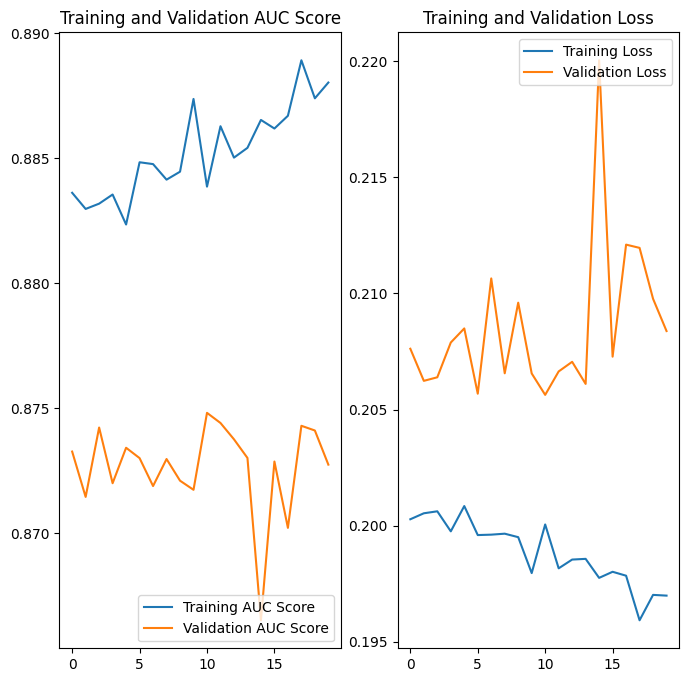

In [41]:
acc = history_1.history['auc']
val_acc = history_1.history['val_auc']

loss = history_1.history['loss']
val_loss = history_1.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training AUC Score')
plt.plot(epochs_range, val_acc, label='Validation AUC Score')
plt.legend(loc='lower right')
plt.title('Training and Validation AUC Score')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Conclusions:**
* Large fluctuations in val_loss using this model
* Recall is very low

#**DL Model 2: Baseline + Dropout Regularization**

In [42]:
model_2 = Sequential([
    layers.Dense(64, input_shape = (X_train_new.shape[-1],), activation = "relu"),
    layers.Dense(32, activation = 'relu'),
    layers.Dropout(0.5),
    layers.Dense(16,activation = "relu"),
    layers.Dropout(0.5),
    layers.Dense(8, activation = "relu"),
    layers.Dense(1, activation = 'sigmoid')
])

In [43]:
model_2.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 64)                8704      
                                                                 
 dense_22 (Dense)            (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_23 (Dense)            (None, 16)                528       
                                                                 
 dropout_3 (Dropout)         (None, 16)                0         
                                                                 
 dense_24 (Dense)            (None, 8)                 136       
                                                                 
 dense_25 (Dense)            (None, 1)                

In [44]:
metrics = [
    keras.metrics.Precision(name = 'precision'),
    keras.metrics.Recall(name = 'recall'),
    keras.metrics.AUC(name = "auc")
]

model_2.compile(optimizer = tf.keras.optimizers.Adam(0.01),
                loss = "binary_crossentropy",
                metrics = metrics)

In [45]:
history_2 = model_2.fit(X_train_new, y_train,
            validation_data = (X_test_new, y_test),
            epochs = 20,
            batch_size = 32,)

Epoch 1/20
1328/1328 [==============================] - 15s 9ms/step - loss: 0.2551 - precision: 0.2530 - recall: 0.0056 - auc: 0.7932 - val_loss: 0.2412 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.8626
Epoch 2/20
1328/1328 [==============================] - 10s 8ms/step - loss: 0.2352 - precision: 0.5754 - recall: 0.1174 - auc: 0.8302 - val_loss: 0.2504 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.8653
Epoch 3/20
1328/1328 [==============================] - 12s 9ms/step - loss: 0.2324 - precision: 0.5872 - recall: 0.1251 - auc: 0.8345 - val_loss: 0.2163 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.8637
Epoch 4/20
1328/1328 [==============================] - 9s 7ms/step - loss: 0.2330 - precision: 0.5186 - recall: 0.0596 - auc: 0.8355 - val_loss: 0.2183 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.8636
Epoch 5/20
1328/1328 [==============================] - 9s 7ms/step - loss: 0.2324 - precision: 0.544

In [47]:
print(history_2.history.keys())

dict_keys(['loss', 'precision', 'recall', 'auc', 'val_loss', 'val_precision', 'val_recall', 'val_auc'])


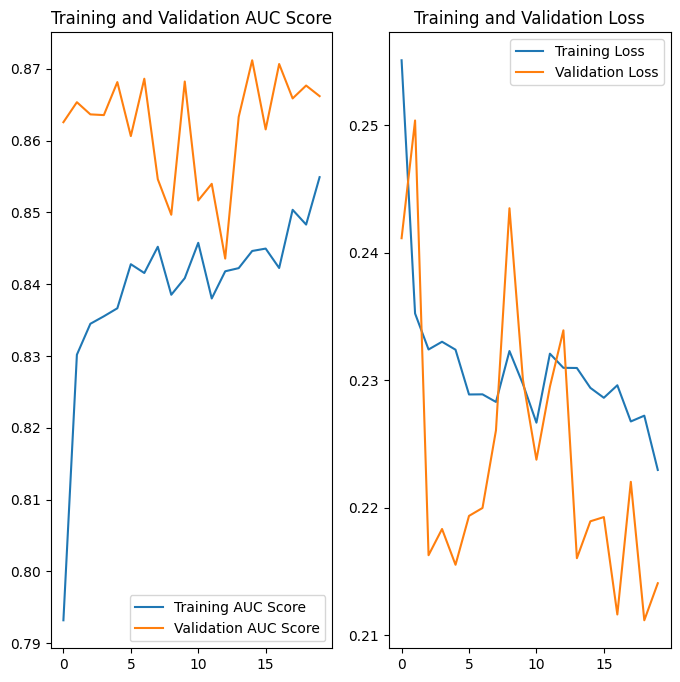

In [48]:
auc = history_2.history['auc']
val_auc = history_2.history['val_auc']

loss = history_2.history["loss"]
val_loss = history_2.history["val_loss"]

epochs_range = 20

plt.figure(figsize = (8,8))
plt.subplot(1,2,1)
plt.plot(auc, label='Training AUC Score')
plt.plot(val_auc, label='Validation AUC Score')
plt.legend(loc='lower right')
plt.title('Training and Validation AUC Score')

plt.subplot(1,2,2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Conclusions:**
* Still not good results as Validation loss is fluctuating too much
* Recall is worse than previous model.
* Not an optimal model

#**DL Model 3: Fixing class imbalance**